# HCP Tutorial
This notebook is the copy of hcp turotial colab notebook provided in neuromatch academy

In [2]:
import os 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#@title Figure settings
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use("https://raw.githubusercontent.com/NeuromatchAcademy/course-content/master/nma.mplstyle")

In [35]:
# The download cells will store the data in nested directories starting here:
HCP_DIR = "./hcp_rest/"
if not os.path.isdir(HCP_DIR):
    os.mkdir(HCP_DIR)

# The data shared for NMA projects is a subset of the full HCP dataset
N_SUBJECTS = 20

# The data have already been aggregated into ROIs from the Glasesr parcellation
N_PARCELS = 360

# The acquisition parameters for all tasks were identical
TR = 0.72  # Time resolution, in sec

# The parcels are matched across hemispheres with the same order
HEMIS = ["Right", "Left"]

# Each experiment was repeated multiple times in each subject
N_RUNS_REST = 4
N_RUNS_TASK = 2

# Time series data are organized by experiment, with each experiment
# having an LR and RL (phase-encode direction) acquistion
BOLD_NAMES = [
  "rfMRI_REST1_LR", "rfMRI_REST1_RL",
  "rfMRI_REST2_LR", "rfMRI_REST2_RL",
  "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR",
  "tfMRI_WM_RL", "tfMRI_WM_LR",
  "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR",
  "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR",
  "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR",
  "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR",
  "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"
]

# You may want to limit the subjects used during code development.
# This will use all subjects:
subjects = range(N_SUBJECTS)

In [5]:
regions = np.load(f"{HCP_DIR}/regions.npy").T
region_info = dict(
    name=regions[0].tolist(),
    network=regions[1],
    myelin=regions[2].astype(np.float),
)


In [12]:
region_info["name"]

['R_V1',
 'R_MST',
 'R_V6',
 'R_V2',
 'R_V3',
 'R_V4',
 'R_V8',
 'R_4',
 'R_3b',
 'R_FEF',
 'R_PEF',
 'R_55b',
 'R_V3A',
 'R_RSC',
 'R_POS2',
 'R_V7',
 'R_IPS1',
 'R_FFC',
 'R_V3B',
 'R_LO1',
 'R_LO2',
 'R_PIT',
 'R_MT',
 'R_A1',
 'R_PSL',
 'R_SFL',
 'R_PCV',
 'R_STV',
 'R_7Pm',
 'R_7m',
 'R_POS1',
 'R_23d',
 'R_v23ab',
 'R_d23ab',
 'R_31pv',
 'R_5m',
 'R_5mv',
 'R_23c',
 'R_5L',
 'R_24dd',
 'R_24dv',
 'R_7AL',
 'R_SCEF',
 'R_6ma',
 'R_7Am',
 'R_7PL',
 'R_7PC',
 'R_LIPv',
 'R_VIP',
 'R_MIP',
 'R_1',
 'R_2',
 'R_3a',
 'R_6d',
 'R_6mp',
 'R_6v',
 'R_p24pr',
 'R_33pr',
 'R_a24pr',
 'R_p32pr',
 'R_a24',
 'R_d32',
 'R_8BM',
 'R_p32',
 'R_10r',
 'R_47m',
 'R_8Av',
 'R_8Ad',
 'R_9m',
 'R_8BL',
 'R_9p',
 'R_10d',
 'R_8C',
 'R_44',
 'R_45',
 'R_47l',
 'R_a47r',
 'R_6r',
 'R_IFJa',
 'R_IFJp',
 'R_IFSp',
 'R_IFSa',
 'R_p9-46v',
 'R_46',
 'R_a9-46v',
 'R_9-46d',
 'R_9a',
 'R_10v',
 'R_a10p',
 'R_10pp',
 'R_11l',
 'R_13l',
 'R_OFC',
 'R_47s',
 'R_LIPd',
 'R_6a',
 'R_i6-8',
 'R_s6-8',
 'R_43',
 'R_O

In [15]:
region_info["network"]

'Visual1'

In [18]:
count_dict = {}
for net in region_info["network"]:
    if net not in count_dict:
        count_dict[net] = 1
    else:
        count_dict[net] += 1

In [19]:
count_dict

{'Visual1': 6,
 'Visual2': 54,
 'Somatomotor': 39,
 'Cingulo-Oper': 56,
 'Language': 23,
 'Default': 23,
 'Frontopariet': 50,
 'Auditory': 15,
 'Dorsal-atten': 7,
 'Posterior-Mu': 77,
 'Orbito-Affec': 6,
 'Ventral-Mult': 4}

/anaconda3/lib/python3.6/site-packages/IPython/core/pylabtools.py:125: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


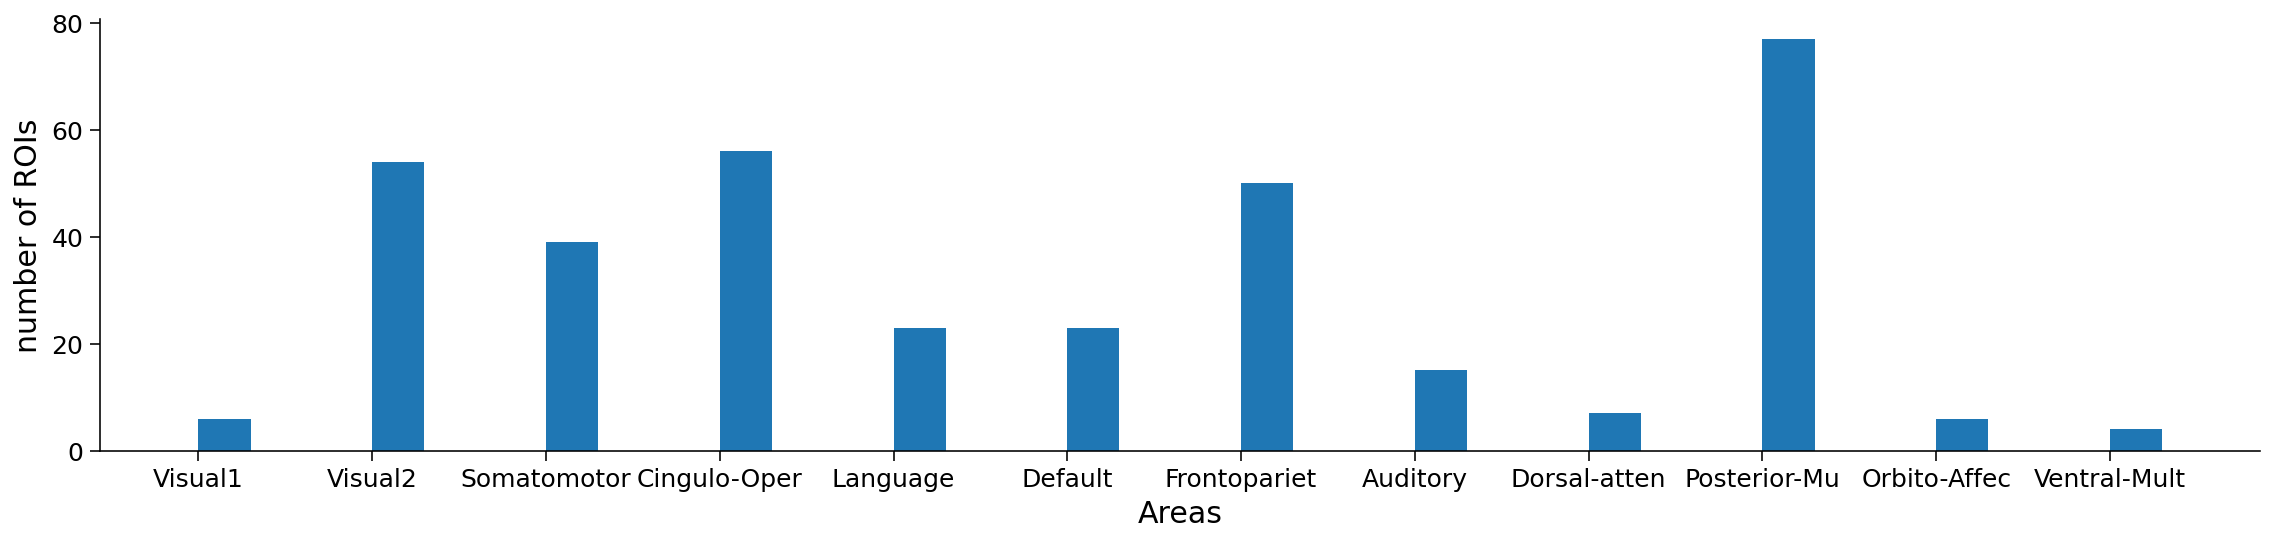

In [27]:
fig = plt.figure(figsize=(15, 3))
ax = fig.add_axes([0,0,1,1])
areas = list(count_dict.keys())
num_ROIs = list(count_dict.values()) 
ax.bar(areas,num_ROIs,align='edge', width=0.3)
plt.ylabel("number of ROIs")
plt.xlabel("Areas")
plt.show()

## Helper functions

In [40]:
def get_image_ids(name):
    """Get the 1-based image indices for runs in a given experiment.

    Args:
      name (str) : Name of experiment ("rest" or name of task) to load
    Returns:
      run_ids (list of int) : Numeric ID for experiment image files

    """
    run_ids = [
    i for i, code in enumerate(BOLD_NAMES, 1) if name.upper() in code
    ]
    if not run_ids:
        raise ValueError(f"Found no data for '{name}''")
    return run_ids

def load_timeseries(subject, name, runs=None, concat=True, remove_mean=True):
    """Load timeseries data for a single subject.

    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean

    Returns
    ts (n_parcel x n_tp array): Array of BOLD data values

    """
    # Get the list relative 0-based index of runs to use
    if runs is None:
        runs = range(N_RUNS_REST) if name == "rest" else range(N_RUNS_TASK)
    elif isinstance(runs, int):
        runs = [runs]

    # Get the first (1-based) run id for this experiment 
    offset = get_image_ids(name)[0]

    # Load each run's data
    bold_data = [
      load_single_timeseries(name,subject, offset + run, remove_mean) for run in runs
    ]

    # Optionally concatenate in time
    if concat:
        bold_data = np.concatenate(bold_data, axis=-1)

    return bold_data

def load_single_timeseries(name,subject, bold_run, remove_mean=True):
    """Load timeseries data for a single subject and single run.

    Args:
    subject (int): 0-based subject ID to load
    bold_run (int): 1-based run index, across all tasks
    remove_mean (bool): If True, subtract the parcel-wise mean

    Returns
    ts (n_parcel x n_timepoint array): Array of BOLD data values

    """
    if name == "rest":
        HCP_DIR = "./hcp_rest/"
    else:
        HCP_DIR = "./hcp_task/"
    bold_path = f"{HCP_DIR}/subjects/{subject}/timeseries"
    bold_file = f"bold{bold_run}_Atlas_MSMAll_Glasser360Cortical.npy"
    ts = np.load(f"{bold_path}/{bold_file}")
    if remove_mean:
        ts -= ts.mean(axis=1, keepdims=True)
    return ts

def load_evs(subject, name, condition):
    """Load EV (explanatory variable) data for one task condition.

    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of task
    condition (str) : Name of condition

    Returns
    evs (list of dicts): A dictionary with the onset, duration, and amplitude
      of the condition for each run.

    """
    evs = []
    for id in get_image_ids(name):
        task_key = BOLD_NAMES[id - 1]
        ev_file = f"{HCP_DIR}/subjects/{subject}/EVs/{task_key}/{condition}.txt"
        ev = dict(zip(["onset", "duration", "amplitude"], np.genfromtxt(ev_file).T))
        evs.append(ev)
    return evs

In [29]:
def condition_frames(run_evs, skip=0):
    """Identify timepoints corresponding to a given condition in each run.

    Args:
    run_evs (list of dicts) : Onset and duration of the event, per run
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

    Returns:
    frames_list (list of 1D arrays): Flat arrays of frame indices, per run

    """
    frames_list = []
    for ev in run_evs:

        # Determine when trial starts, rounded down
        start = np.floor(ev["onset"] / TR).astype(int)

        # Use trial duration to determine how many frames to include for trial
        duration = np.ceil(ev["duration"] / TR).astype(int)

        # Take the range of frames that correspond to this specific trial
        frames = [s + np.arange(skip, d) for s, d in zip(start, duration)]

        frames_list.append(np.concatenate(frames))

    return frames_list

def selective_average(timeseries_data, ev, skip=0):
    """Take the temporal mean across frames for a given condition.

    Args:
    timeseries_data (array or list of arrays): n_parcel x n_tp arrays
    ev (dict or list of dicts): Condition timing information
    skip (int) : Ignore this many frames at the start of each trial, to account
      for hemodynamic lag

    Returns:
    avg_data (1D array): Data averagted across selected image frames based
    on condition timing

    """
    # Ensure that we have lists of the same length
    if not isinstance(timeseries_data, list):
        timeseries_data = [timeseries_data]
    if not isinstance(ev, list):
        ev = [ev]
    if len(timeseries_data) != len(ev):
        raise ValueError("Length of `timeseries_data` and `ev` must match.")

    # Identify the indices of relevant frames
    frames = condition_frames(ev)

    # Select the frames from each image
    selected_data = []
    for run_data, run_frames in zip(timeseries_data, frames):
        selected_data.append(run_data[:, run_frames])

    # Take the average in each parcel
    avg_data = np.concatenate(selected_data, axis=-1).mean(axis=-1)
    return avg_data

In [30]:
help(load_timeseries)

Help on function load_timeseries in module __main__:

load_timeseries(subject, name, runs=None, concat=True, remove_mean=True)
    Load timeseries data for a single subject.
    
    Args:
    subject (int): 0-based subject ID to load
    name (str) : Name of experiment ("rest" or name of task) to load
    run (None or int or list of ints): 0-based run(s) of the task to load,
      or None to load all runs.
    concat (bool) : If True, concatenate multiple runs in time
    remove_mean (bool) : If True, subtract the parcel-wise mean
    
    Returns
    ts (n_parcel x n_tp array): Array of BOLD data values



In [33]:
timeseries = load_timeseries(subject=0, name="rest", runs=1)
print(timeseries.shape)  # n_parcel x n_timepoint

(360, 1200)


In [36]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "rest")
    timeseries_rest.append(ts_concat)

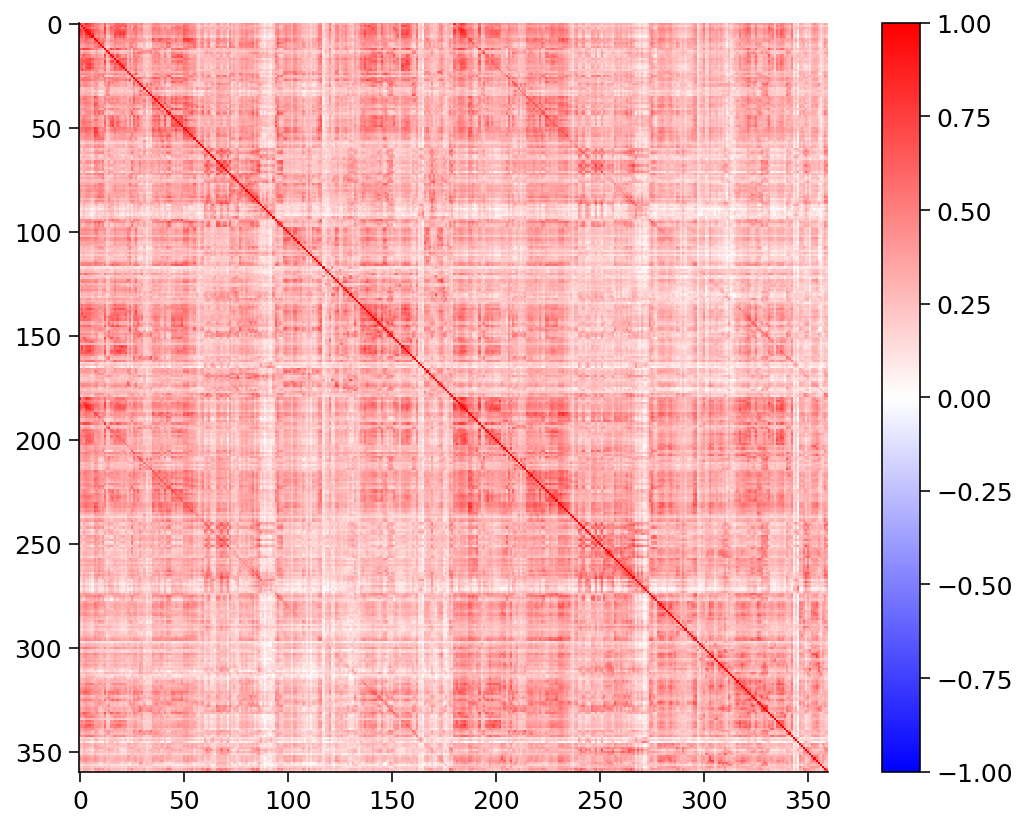

In [37]:
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

## TODO: Make functional connectivity maps for various tasks

### Social

In [48]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "social")
    timeseries_rest.append(ts_concat)

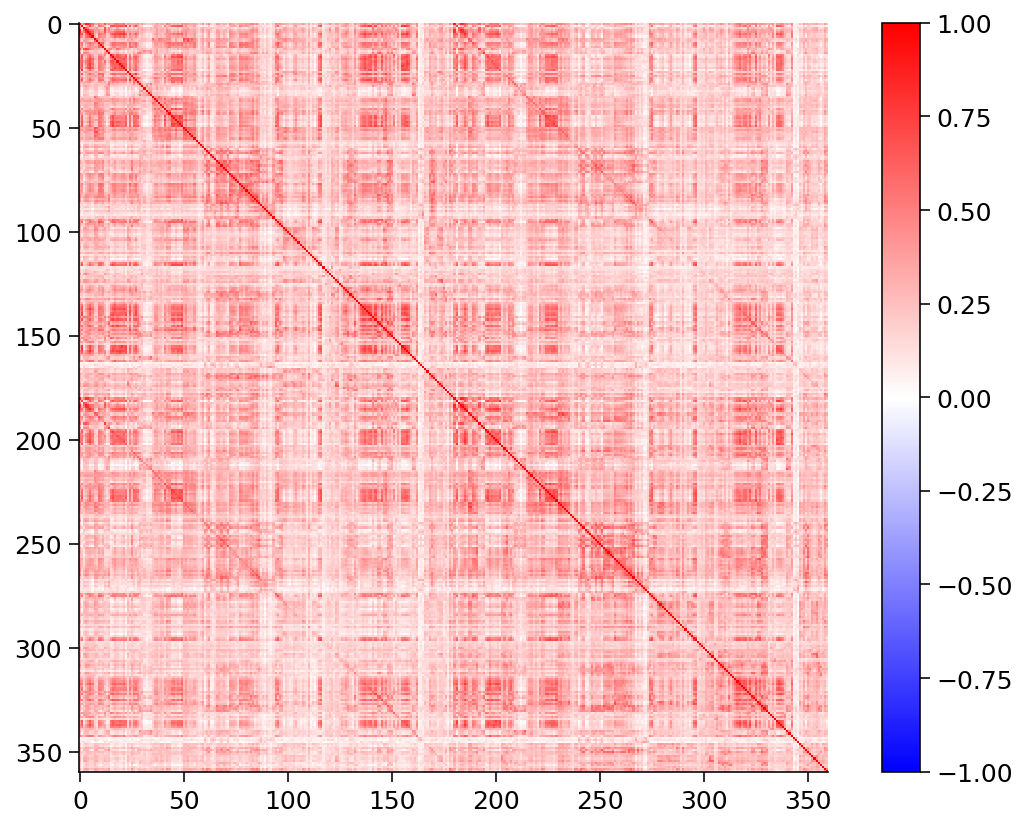

In [49]:
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Gambling

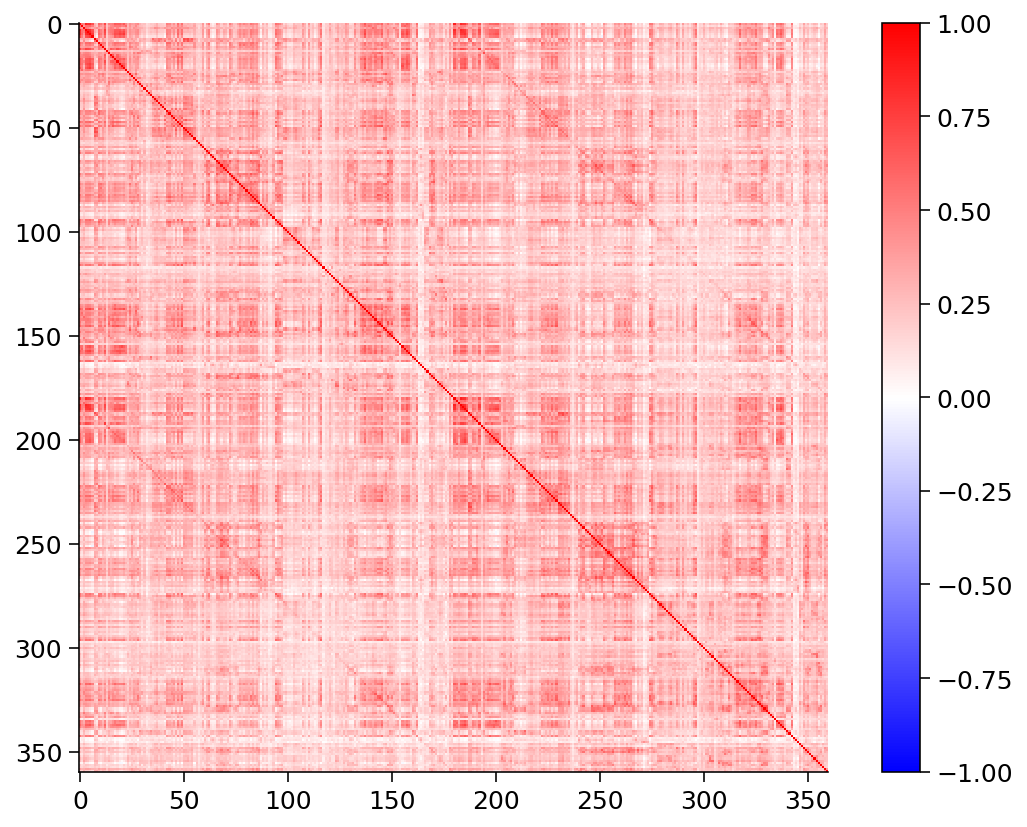

In [50]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "gambling")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Language

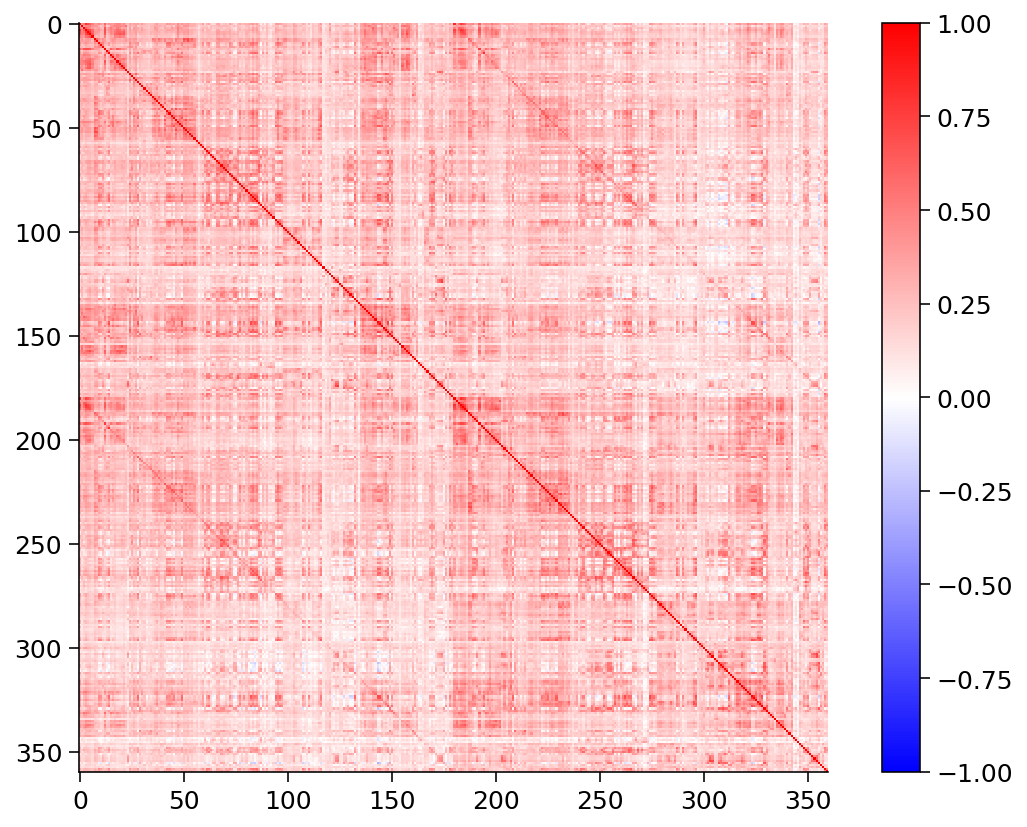

In [51]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "language")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Working Memory

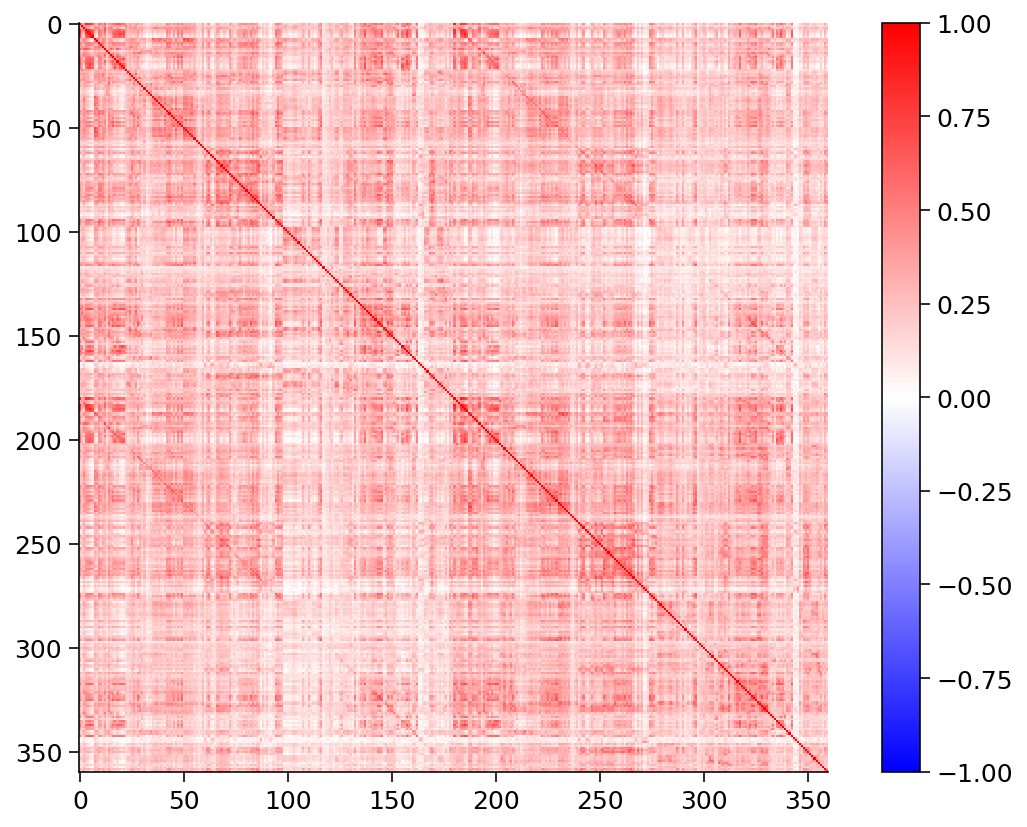

In [52]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "wm")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Emotion

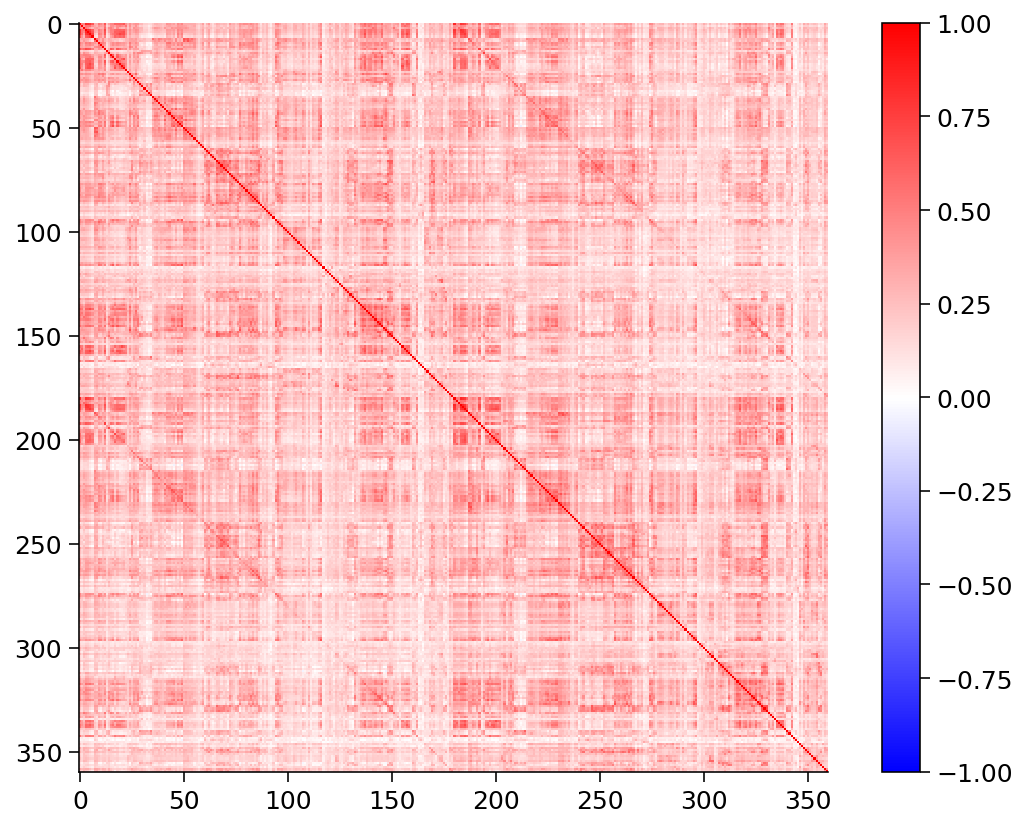

In [53]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "emotion")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Motor

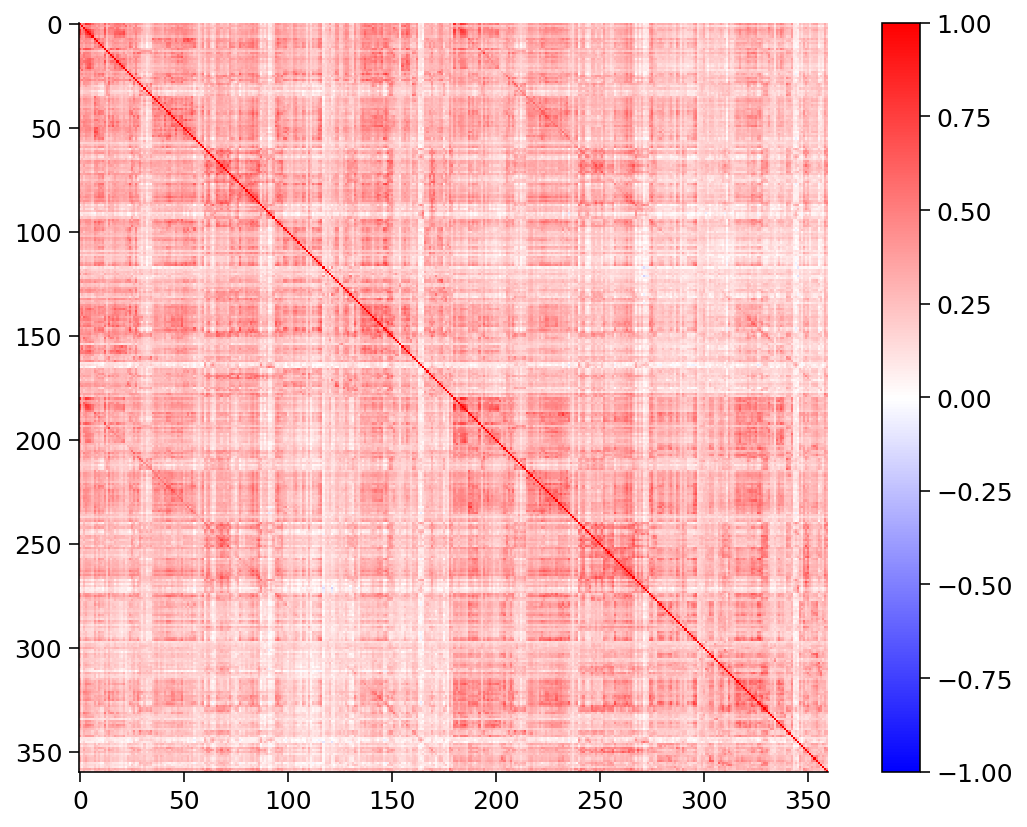

In [54]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "motor")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Relational

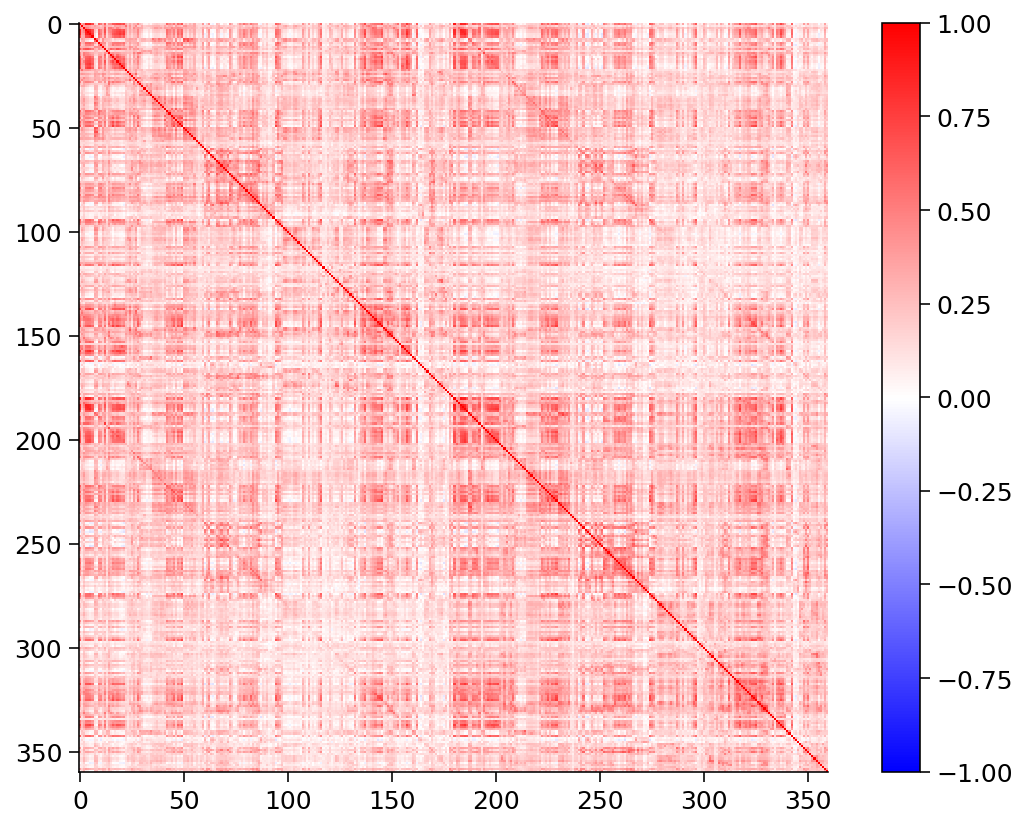

In [55]:
timeseries_rest = []
for subject in subjects:
    ts_concat = load_timeseries(subject, "relational")
    timeseries_rest.append(ts_concat)
    
fc = np.zeros((N_SUBJECTS, N_PARCELS, N_PARCELS))
for sub, ts in enumerate(timeseries_rest):
    fc[sub] = np.corrcoef(ts)

group_fc = fc.mean(axis=0)

plt.imshow(group_fc, interpolation="none", cmap="bwr", vmin=-1, vmax=1)
plt.colorbar()
plt.show()

### Analysis Pipeline
- correlation matrix for tasks
- dimensionality reduction


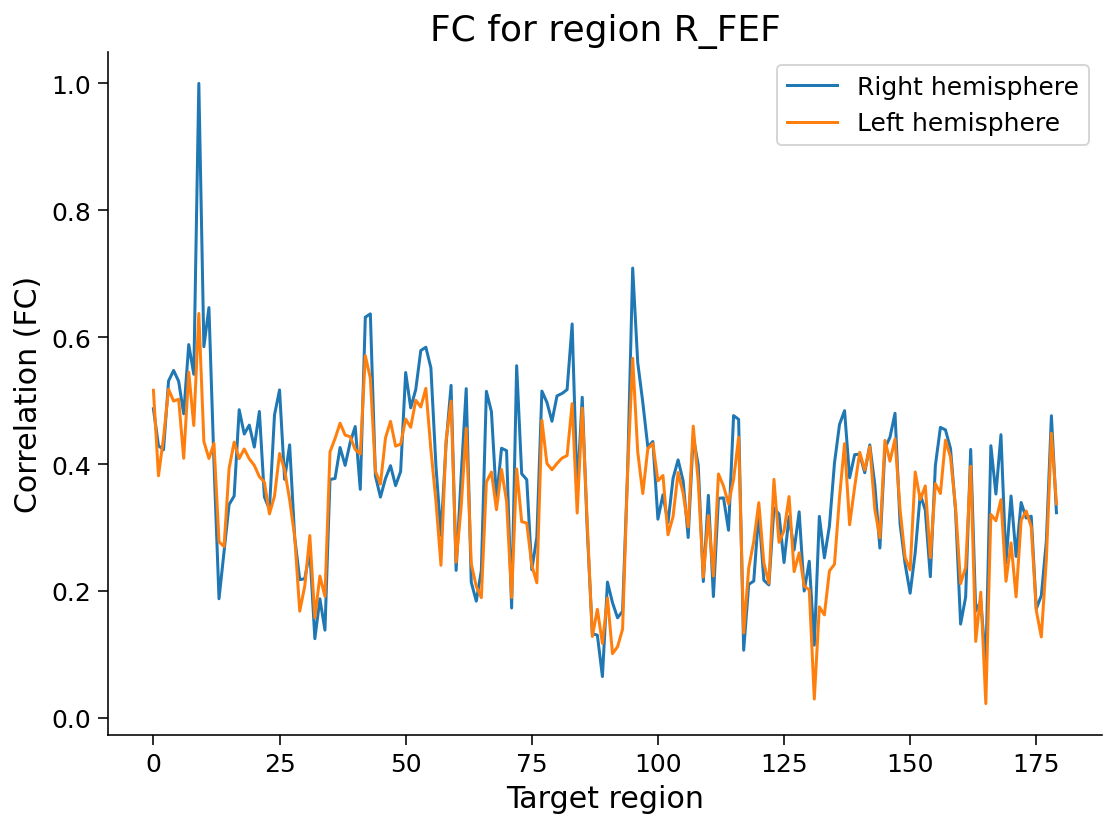

In [38]:
seed_roi = "R_FEF"  # name of seed parcel
ind = region_info["name"].index(seed_roi)

hemi_fc = np.split(group_fc, 2)

# Plot the FC profile across the right and left hemisphere target regions
for i, hemi_fc in enumerate(hemi_fc):
    plt.plot(hemi_fc[:, ind], label=f"{HEMIS[i]} hemisphere")
plt.title(f"FC for region {seed_roi}")
plt.xlabel("Target region")
plt.ylabel("Correlation (FC)")
plt.legend()
plt.show()

In [41]:
timeseries_task = []
for subject in subjects:
    timeseries_task.append(load_timeseries(subject, "motor", concat=False))

In [44]:
HCP_DIR = "./hcp_task/"
task = "motor"
conditions = ["lf", "rf"]  # Run a substraction analysis between two conditions

contrast = []
for subject in subjects:

    # Get the average signal in each region for each condition
    evs = [load_evs(subject, task, cond) for cond in conditions]
    avgs = [selective_average(timeseries_task[subject], ev) for ev in evs]

    # Store the region-wise difference
    contrast.append(avgs[0] - avgs[1])

group_contrast = np.mean(contrast, axis=0)

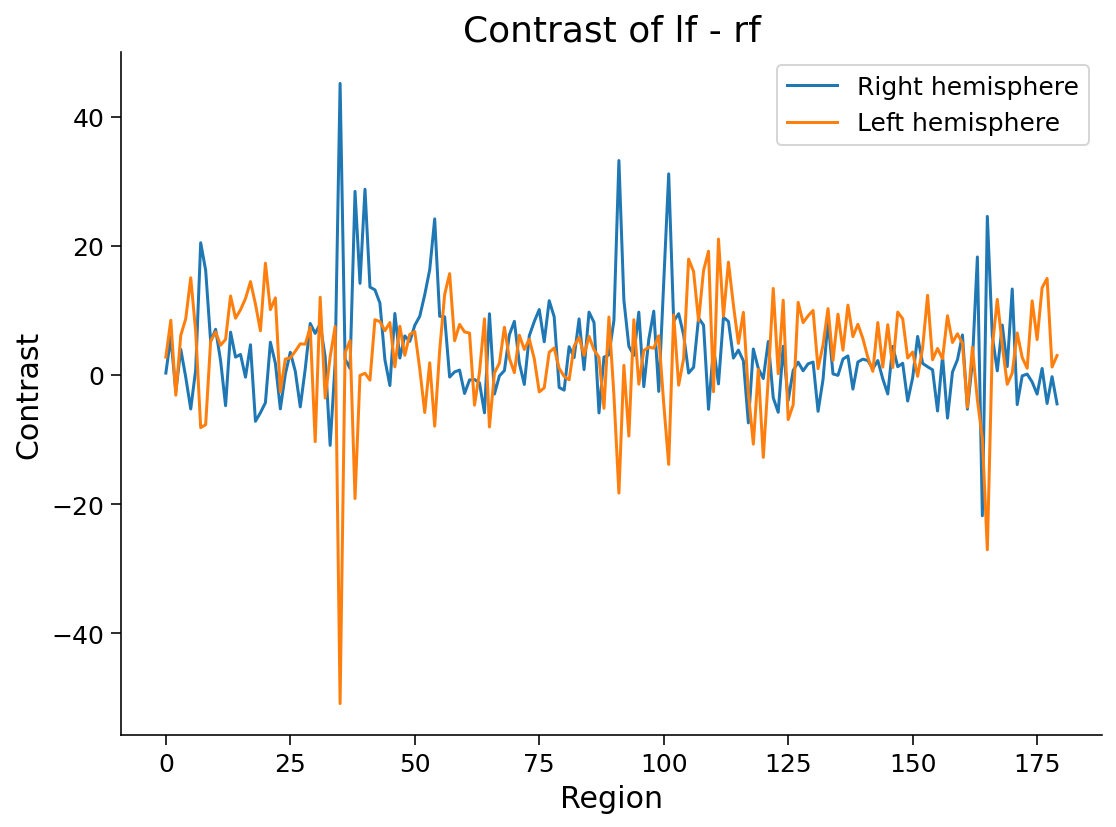

In [45]:
hemi_contrasts = np.split(group_contrast, 2)

for i, hemi_contrast in enumerate(hemi_contrasts):
    plt.plot(hemi_contrast, label=f"{HEMIS[i]} hemisphere")

plt.title("Contrast of %s - %s" % (conditions[0], conditions[1]))
plt.xlabel("Region")
plt.ylabel('Contrast')
plt.legend()
plt.show()

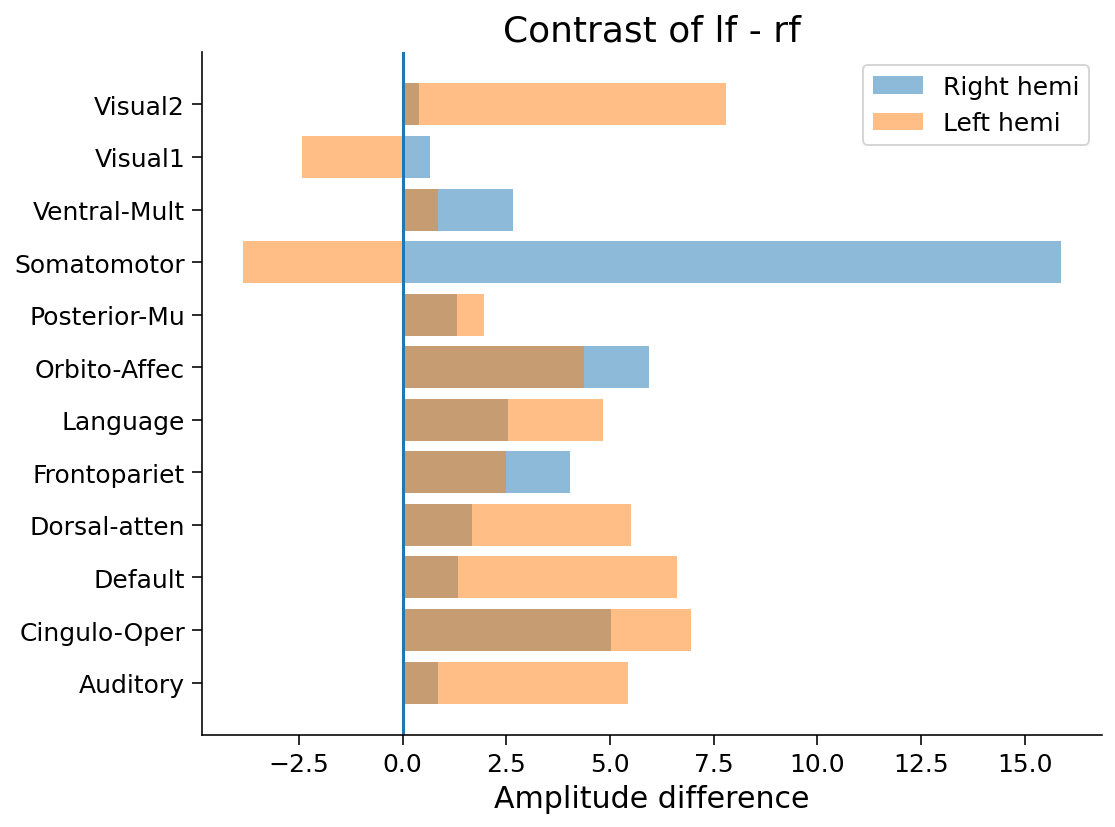

In [47]:
network_names = np.unique(region_info["network"])

hemi_networks = np.split(region_info["network"], 2)
hemi_contrasts = np.split(group_contrast, 2)

# Get and plot mean contrast value per network, by hemisphere
for hemi, hemi_network, hemi_contrast in zip(HEMIS, hemi_networks, hemi_contrasts):
    network_vals = []
    for network in network_names:
        network_vals.append(hemi_contrast[hemi_network == network].mean())
    plt.barh(network_names, network_vals, alpha=.5, label=f"{hemi} hemi")

plt.axvline(0)
plt.xlabel("Amplitude difference")
plt.title(f"Contrast of {conditions[0]} - {conditions[1]}")
plt.legend()
plt.show()


## Resting-state

In [2]:
hcp_loc = "hcp/subjects/"
hcp_rest_loc = "hcp_rest/subjects/"

In [9]:
n_parcels = 360 # number of parcels
n_subjects = 10 # number of subjects
TR = 0.72 # reptition time in sec (time interval between time points )

subjects = range(0,n_subjects)
bold_runs = [1,2,3,4] # resting-state runs

In [6]:
### Function to load timeseries 
def load_timeseries(data_loc, subject_id, bold_run):
    bold_file = "%s/%s/timeseries/bold%s_Atlas_MSMAll_Glasser360Cortical.npy" % (data_loc, subject_id, bold_run)
    ts = np.load(bold_file)
    ts = (ts.T - np.mean(ts,axis=1)).T # subtract mean value per parcel
    return ts

    ### Function to concatenate timeseries
def concatenate_timeseries(data_loc, subject_id, bold_runs):
    bold_run = bold_runs[0]
    ts_concat = load_timeseries(data_loc, subject_id, bold_run)
    for bold_run in bold_runs[1:]:
        ts_new = load_timeseries(data_loc, subject_id, bold_run)
        ts_concat = np.concatenate((ts_concat, ts_new), axis=1)
    return ts_concat

In [10]:
timeseries_rest = []
for subject in subjects:
    ts_concat =  concatenate_timeseries(hcp_rest_loc, str(subject+1), bold_runs)
    timeseries_rest.append(ts_concat)

In [23]:
timeseries_rest = np.array(timeseries_rest)

In [25]:
timeseries_rest.shape # (# subjects, # parcels, # timepoints)

(10, 360, 4800)

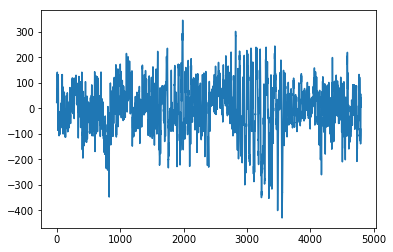

In [27]:
plt.plot(list(range(4800)),timeseries_rest[0,0,:])

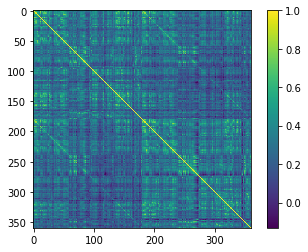

In [11]:
### Generate correlation matrix ("functional connectivity"/FC) for each subject
fc = np.zeros((n_subjects,n_parcels,n_parcels))
for sub in subjects:
    ts = timeseries_rest[sub]
    fc[sub] = np.corrcoef(ts)

### Plot the group-averaged correlation matrix
plt.imshow(fc.mean(0), interpolation='none')
plt.colorbar()

Text(0, 0.5, 'Correlation (FC)')

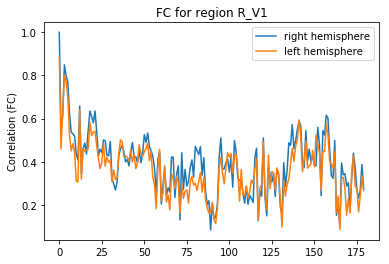

In [12]:
### Plot FC profile for a given seed parcel

regions = np.load("hcp_rest/regions.npy") # Load region info
seed_roi = 'R_V1' # seed parcel
ind = np.where(regions[:,0] == seed_roi)[0]

plt.plot(fc.mean(0)[:180,ind[0]], label='right hemisphere') # Plot profile for right hemisphere
plt.plot(fc.mean(0)[180:,ind[0]], label='left hemisphere') # Plot profile for left hemisphere
plt.legend()
plt.title("FC for region %s" % seed_roi)
plt.ylabel('Correlation (FC)')

## Task-state

In [14]:
data_loc = "hcp_task/subjects"
n_subjects = 10
n_parcels = 360
TR = 0.72 # reptition time in sec (time interval between time points )
run_name = ["rfMRI_REST1_LR", "rfMRI_REST1_RL", "rfMRI_REST2_LR", "rfMRI_REST2_RL", "tfMRI_MOTOR_RL", "tfMRI_MOTOR_LR", "tfMRI_WM_RL", "tfMRI_WM_LR", "tfMRI_EMOTION_RL", "tfMRI_EMOTION_LR", "tfMRI_GAMBLING_RL", "tfMRI_GAMBLING_LR", "tfMRI_LANGUAGE_RL", "tfMRI_LANGUAGE_LR", "tfMRI_RELATIONAL_RL", "tfMRI_RELATIONAL_LR", "tfMRI_SOCIAL_RL", "tfMRI_SOCIAL_LR"]


subjects = range(0,n_subjects)

bold_runs = [5,6] # Select motor task runs

# Load task time series for each subject
timeseries_task = []
for subject in subjects:
    tsi = []
    for bold_run in bold_runs:
        tsi.append(load_timeseries(data_loc, str(subject+1), bold_run))
        timeseries_task.append(tsi)

In [13]:
### Function to load event time files (EVs)
def load_evs(data_loc, subject_id, bold_names, condition):
    out = []
    for bold_name in bold_names:
        ev_file = "%s/%s/EVs/%s/%s.txt" % (data_loc, subject_id, bold_name, condition) 
        evs = np.loadtxt(ev_file, delimiter="\t")
        out.append(evs)
    return out

### Function to extract frames of interest
def frames_of_interest(evs_list):
    frames_list = []
    for evs in evs_list:
        frames = []
        for row in range(len(evs)):
            ## - determine when trial starts, rounded down
            start = int(np.floor(evs[row][0]/TR))

            ## - use trial duration to determine how many frames to include for trial
            duration = int(np.floor(evs[row][1]/TR))

            ## - use duration to calculation ending frame
            end = int(start + duration)

            ## - take the range of frames that correspond to this specific trial and append them to our frames vector
            frames = np.concatenate((frames, np.arange(start, end)), axis=0)

            ## - convert to int so frames can be used as an index and return
            frames = frames.astype(int)
        frames_list.append(frames)
    return frames_list

In [15]:
###  Generate an activation contrast map bewteen two conditions 

bold_names = [run_name[bold_run - 1] for bold_run in bold_runs]

conditions = ['lf','rf'] # specify two conditions within task (left foot and right foot)

contrast = []
for subject in subjects:
    evs_0 = load_evs(data_loc, str(subject+1), bold_names, conditions[0])
    evs_1 = load_evs(data_loc, str(subject+1), bold_names, conditions[1])


    cond_frames_0 = frames_of_interest(evs_0)
    cond_frames_1 = frames_of_interest(evs_1)

    ## - get average activation across condition for each parcel
    maps_0 = np.array([ np.mean(timeseries_task[subject][i][:,cond_frames_0[i]], axis=1) for i in range(len(cond_frames_0))])
    maps_1 = np.array([ np.mean(timeseries_task[subject][i][:,cond_frames_1[i]], axis=1) for i in range(len(cond_frames_1))])

    ## - calculate contrast by subtracting timeseries from each other
    sub_contrast = maps_0.mean(0) - maps_1.mean(0)
    contrast.append(sub_contrast)

Text(0, 0.5, 'Contrast')

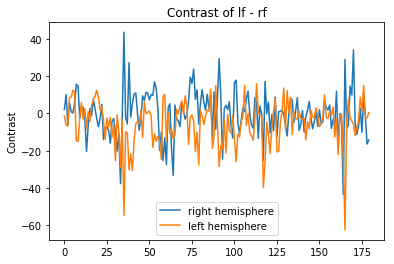

In [16]:
### Plot group-aveaged contrast map

group_contrast = np.array(contrast).mean(0)

plt.plot(group_contrast[:180], label='right hemisphere') # Plot profile for right hemisphere
plt.plot(group_contrast[180:], label='left hemisphere') # Plot profile for left hemisphere
plt.legend()
plt.title("Contrast of %s - %s" % (conditions[0], conditions[1]))
plt.ylabel('Contrast')

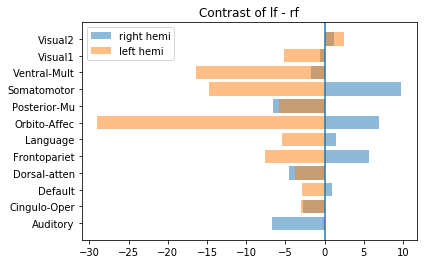

In [17]:
### Characterize contrast by functional network

regions = np.load("hcp_task/regions.npy") # Load region info
networks = np.unique(regions[:,1]) # Get unique network labels

# Get mean contrast value per network, for right hemisphere
vals_r = []
for network in networks:
    inds = np.where(regions[:180,1]==network)[0]
    vals_r.append(group_contrast[:180][inds].mean())

# Get mean contrast value per network, for left hemisphere
vals_l = []
for network in networks:
    inds = np.where(regions[180:,1]==network)[0]
    vals_l.append(group_contrast[180:][inds].mean())

# Plot mean contrast value per network, per hemisphere
plt.barh(np.arange(len(networks)), vals_r, label='right hemi',alpha=0.5)
plt.yticks(np.arange(len(networks)), networks)

plt.barh(np.arange(len(networks)), vals_l, label='left hemi',alpha=0.5)
plt.yticks(np.arange(len(networks)), networks)
plt.axvline(0)

plt.title("Contrast of %s - %s" % (conditions[0], conditions[1]))
plt.legend()

In [3]:
bold1 = np.load("hcp/subjects/0/timeseries/bold1_Atlas_MSMAll_Glasser360Cortical.npy") 

In [4]:
bold1.shape

(360, 1200)

In [6]:
regions = np.load("hcp_task/regions.npy")

In [7]:
regions.shape

(360, 3)

In [8]:
regions

array([['R_V1', 'Visual1', '2.209'],
       ['R_MST', 'Visual2', '2.05561'],
       ['R_V6', 'Visual2', '2.1498'],
       ...,
       ['L_PI', 'Cingulo-Oper', '1.74335'],
       ['L_a32pr', 'Cingulo-Oper', '1.73082'],
       ['L_p24', 'Cingulo-Oper', '1.65968']], dtype='<U12')

How does information flow between regions change to perform various taksks?
- dataset: HCP dataset
- methods: 